# Data visualisations

## Setup

### Imports

In [1]:
from titanic.dataset import load_titanic_data, Passenger

import numpy as np
from collections import defaultdict

import matplotlib.pyplot as plt

### Data loading

In [2]:
training_file = "../dataset/train.csv"

training_data = load_titanic_data(training_file)
print("Training data loaded. Number of records:", len(training_data))

Training data loaded. Number of records: 891


## Distributions

In [8]:
adults = [p for p in training_data if p.age is not None and p.age >= 18]
children = [p for p in training_data if p.age is not None and p.age < 18]

females = [p for p in training_data if p.sex == 'female']
males = [p for p in training_data if p.sex == 'male']
child_survived = [p for p in children if p.survived]

families: defaultdict[tuple[str, str], list[Passenger]] = defaultdict(list)

for p in training_data:
    name = p.name
    ticket = p.ticket
    surname = name.split(',')[0].strip() if ',' in name else name
    
    key = (surname, ticket)
    families[key].append(p)


### Charts #1

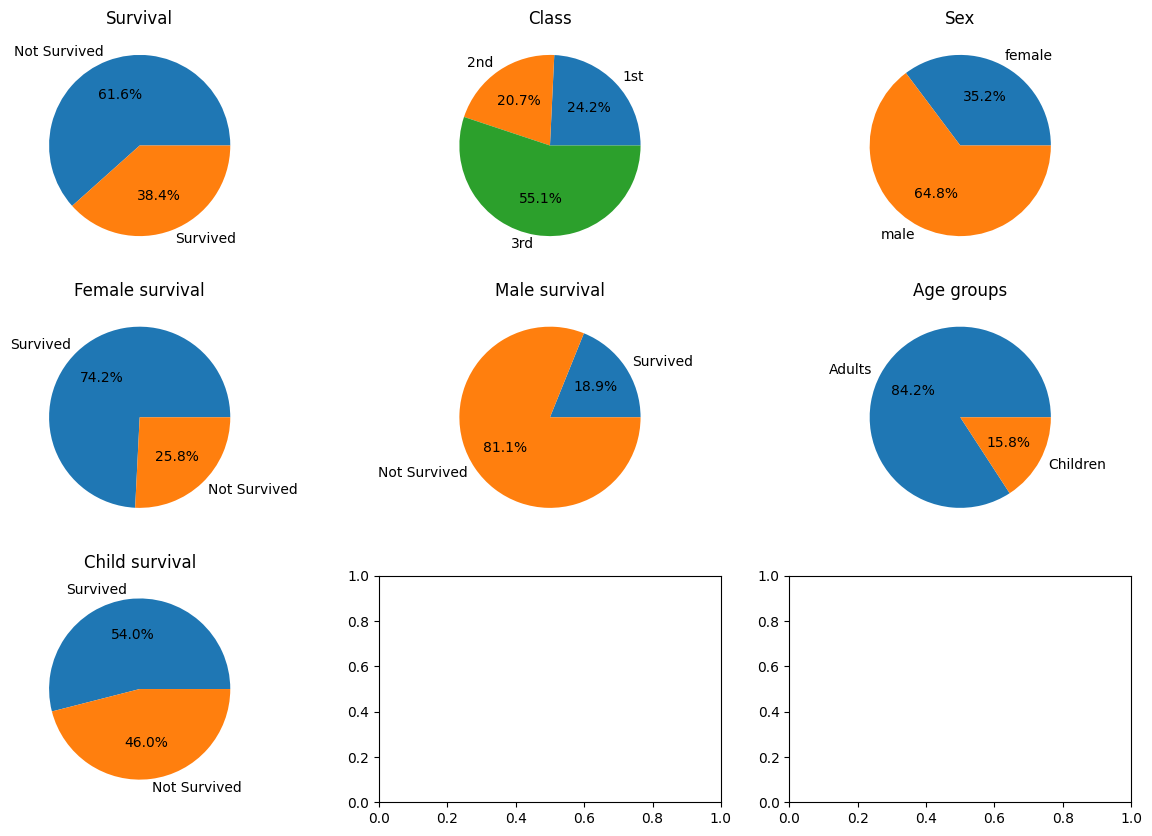

In [6]:
pclass_data = [person.pclass for person in training_data]
sex_data = [person.sex for person in training_data]
survived_data = [person.survived for person in training_data]

fig, axs = plt.subplots(3, 3, figsize=(15, 10))

survived_ax = axs[0][0]
survived_ax.set_title("Survival")
survived_ax.pie(
    [survived_data.count(False), survived_data.count(True)],
    labels=["Not Survived", "Survived"],
    autopct='%1.1f%%',
)

class_ax = axs[0][1]
class_ax.set_title("Class")
class_ax.pie(
    [pclass_data.count(i) for i in range(1, 4)], 
    labels=["1st", "2nd", "3rd"], 
    autopct='%1.1f%%',
)

sex_ax = axs[0][2]
sex_ax.set_title("Sex")
sex_ax.pie(
    [sex_data.count('female'), sex_data.count('male')],
    labels=["female", "male"],
    autopct='%1.1f%%',
)

female_survived_ax = axs[1][0]
female_survived_ax.set_title("Female survival")
female_survived_ax.pie(
    [len([female for female in females if female.survived]), 
     len([female for female in females if not female.survived])],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

male_survived_ax = axs[1][1]
male_survived_ax.set_title("Male survival")
male_survived_ax.pie(
    [len([male for male in males if male.survived]), 
     len([male for male in males if not male.survived])],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

child_adult_ax = axs[1][2]
child_adult_ax.set_title("Age groups")
child_adult_ax.pie(
    [len(adults), len(children)],
    labels=["Adults", "Children"],
    autopct='%1.1f%%',
)

child_survived_ax = axs[2][0]
child_survived_ax.set_title("Child survival")
child_survived_ax.pie(
    [len(child_survived), len(children) - len(child_survived)],
    labels=["Survived", "Not Survived"],
    autopct='%1.1f%%',
)

plt.show()

### Charts #2

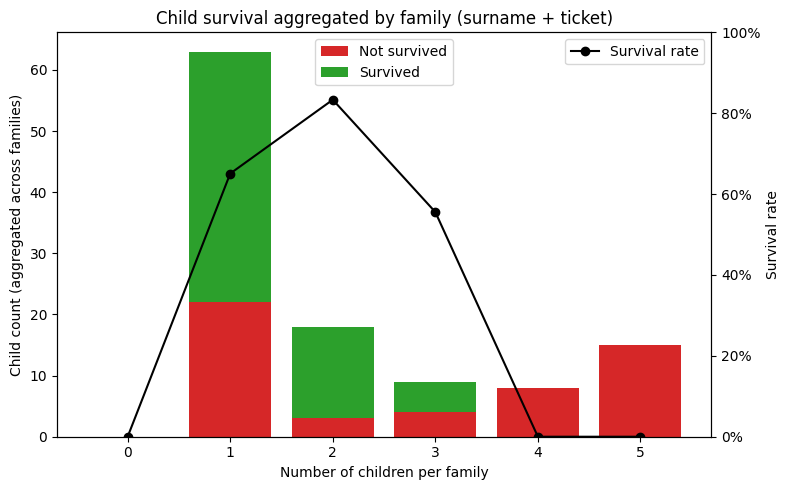

In [ ]:

from matplotlib.ticker import PercentFormatter

family_child_stats = {}
for key, members in families.items():
    family_children = [m for m in members if m.age is not None and m.age < 18]
    num_children = len(family_children)
    survived_children = sum(1 for m in family_children if m.survived)
    survived_adults = sum(1 for m in members if m.age is not None and m.age >= 18 and m.survived)
    
    family_child_stats[key] = {
        'children': num_children, 
        'survived_children': survived_children,
        'survived_adults': survived_adults,
        'family_size': len(members)
    }

agg = defaultdict(lambda: {'total_children': 0, 'survived_children': 0})
for stats in family_child_stats.values():
    k = stats['children']
    agg[k]['total_children'] += stats['children']
    agg[k]['survived_children'] += stats['survived_children']

ks = sorted(agg.keys())
survived = [agg[k]['survived_children'] for k in ks]
not_surv = [agg[k]['total_children'] - agg[k]['survived_children'] for k in ks]
totals = [s + n for s, n in zip(survived, not_surv)]
rate = [s / t if t > 0 else 0 for s, t in zip(survived, totals)]

fig, ax = plt.subplots(figsize=(8, 5))
ax.bar(ks, not_surv, label='Not survived', color='tab:red')
ax.bar(ks, survived, bottom=not_surv, label='Survived', color='tab:green')
ax.set_xlabel('Number of children per family')
ax.set_ylabel('Child count (aggregated across families)')
ax.set_title('Child survival aggregated by family (surname + ticket)')
ax.set_xticks(ks)
ax.legend(loc='upper center')

ax2 = ax.twinx()
ax2.plot(ks, rate, color='black', marker='o', label='Survival rate')
ax2.set_ylabel('Survival rate')
ax2.set_ylim(0, 1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax=1))
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
